# Breast Cancer Classification - ML Assignment 2
## Training 6 Machine Learning Models

This notebook trains 6 classification models on the Breast Cancer Wisconsin (Diagnostic) dataset and evaluates their performance using 6 different metrics.

**Models:**
1. Logistic Regression
2. Decision Tree
3. K-Nearest Neighbors
4. Naive Bayes
5. Random Forest
6. XGBoost

**Metrics:**
1. Accuracy
2. AUC Score
3. Precision
4. Recall
5. F1 Score
6. MCC Score

## 1. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, roc_auc_score, precision_score,
                             recall_score, f1_score, matthews_corrcoef,
                             confusion_matrix, classification_report)
import pickle
import os

print("All libraries imported successfully!")

All libraries imported successfully!


## 2. Load and Explore the Dataset

In [2]:
# Load the dataset
print("Loading Breast Cancer Wisconsin (Diagnostic) dataset...")
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

print(f"\nDataset shape: {df.shape}")
print(f"Features: {len(df.columns) - 1} (30 input features + 1 target)")
print(f"\nTarget distribution:")
print(df['target'].value_counts())
print("\nTarget labels: 0 = Malignant (Cancer), 1 = Benign (No Cancer)")

# Display first few rows
print("\nFirst 5 rows of the dataset:")
df.head()

Loading Breast Cancer Wisconsin (Diagnostic) dataset...

Dataset shape: (569, 31)
Features: 30 (30 input features + 1 target)

Target distribution:
target
1    357
0    212
Name: count, dtype: int64

Target labels: 0 = Malignant (Cancer), 1 = Benign (No Cancer)

First 5 rows of the dataset:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum().sum())

# Dataset info
print("\nDataset information:")
df.info()

Missing values:
0

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null   

## 3. Data Preprocessing

In [4]:
# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (569, 30)
Target shape: (569,)


In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 455 samples
Test set size: 114 samples


In [6]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed!")
print(f"Scaled training data shape: {X_train_scaled.shape}")
print(f"Scaled test data shape: {X_test_scaled.shape}")

Feature scaling completed!
Scaled training data shape: (455, 30)
Scaled test data shape: (114, 30)


In [7]:
# Save the scaler for later use
os.makedirs('model', exist_ok=True)
with open('model/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

## 4. Define Evaluation Function

In [8]:
# Dictionary to store all results
results = {}

# Function to evaluate model performance
def evaluate_model(model, X_test, y_test, model_name):
    """
    Evaluate a trained model and return all metrics
    """
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else y_pred

    # Calculate metrics
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'AUC': roc_auc_score(y_test, y_pred_proba),
        'Precision': precision_score(y_test, y_pred, zero_division=0),
        'Recall': recall_score(y_test, y_pred, zero_division=0),
        'F1': f1_score(y_test, y_pred, zero_division=0),
        'MCC': matthews_corrcoef(y_test, y_pred)
    }

    # Print results
    print(f"\n{model_name} Results:")
    print("-" * 50)
    for metric, value in metrics.items():
        print(f"{metric:12s}: {value:.4f}")

    return metrics, y_pred

## 5. Train and Evaluate Models

### 5.1 Logistic Regression

In [9]:
print("Training Logistic Regression...")

lr_model = LogisticRegression(random_state=42, max_iter=10000)
lr_model.fit(X_train_scaled, y_train)

results['Logistic Regression'], lr_pred = evaluate_model(lr_model, X_test_scaled, y_test, 'Logistic Regression')

# Save model
with open('model/logistic_regression.pkl', 'wb') as f:
    pickle.dump(lr_model, f)

print("\nLogistic Regression model saved!")

Training Logistic Regression...

Logistic Regression Results:
--------------------------------------------------
Accuracy    : 0.9825
AUC         : 0.9954
Precision   : 0.9861
Recall      : 0.9861
F1          : 0.9861
MCC         : 0.9623

Logistic Regression model saved!


### 5.2 Decision Tree

In [10]:
print("Training Decision Tree...")

dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)

results['Decision Tree'], dt_pred = evaluate_model(dt_model, X_test, y_test, 'Decision Tree')

# Save model
with open('model/decision_tree.pkl', 'wb') as f:
    pickle.dump(dt_model, f)

print("\nDecision Tree model saved!")

Training Decision Tree...

Decision Tree Results:
--------------------------------------------------
Accuracy    : 0.9211
AUC         : 0.9163
Precision   : 0.9565
Recall      : 0.9167
F1          : 0.9362
MCC         : 0.8341

Decision Tree model saved!


### 5.3 K-Nearest Neighbors

In [11]:
print("Training K-Nearest Neighbors...")

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

results['kNN'], knn_pred = evaluate_model(knn_model, X_test_scaled, y_test, 'K-Nearest Neighbors')

# Save model
with open('model/knn.pkl', 'wb') as f:
    pickle.dump(knn_model, f)

print("\nK-Nearest Neighbors model saved!")

Training K-Nearest Neighbors...

K-Nearest Neighbors Results:
--------------------------------------------------
Accuracy    : 0.9561
AUC         : 0.9788
Precision   : 0.9589
Recall      : 0.9722
F1          : 0.9655
MCC         : 0.9054

K-Nearest Neighbors model saved!


### 5.4 Naive Bayes

In [12]:
print("Training Naive Bayes (Gaussian)...")

nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

results['Naive Bayes'], nb_pred = evaluate_model(nb_model, X_test_scaled, y_test, 'Naive Bayes')

# Save model
with open('model/naive_bayes.pkl', 'wb') as f:
    pickle.dump(nb_model, f)

print("\nNaive Bayes model saved!")

Training Naive Bayes (Gaussian)...

Naive Bayes Results:
--------------------------------------------------
Accuracy    : 0.9298
AUC         : 0.9868
Precision   : 0.9444
Recall      : 0.9444
F1          : 0.9444
MCC         : 0.8492

Naive Bayes model saved!


### 5.5 Random Forest

In [13]:
print("Training Random Forest...")

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rf_model.fit(X_train, y_train)

results['Random Forest'], rf_pred = evaluate_model(rf_model, X_test, y_test, 'Random Forest')

# Save model
with open('model/random_forest.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

print("\nRandom Forest model saved!")

Training Random Forest...

Random Forest Results:
--------------------------------------------------
Accuracy    : 0.9561
AUC         : 0.9937
Precision   : 0.9589
Recall      : 0.9722
F1          : 0.9655
MCC         : 0.9054

Random Forest model saved!


### 5.6 XGBoost

In [14]:
print("Training XGBoost...")

xgb_model = XGBClassifier(random_state=42, eval_metric='logloss', use_label_encoder=False)
xgb_model.fit(X_train, y_train)

results['XGBoost'], xgb_pred = evaluate_model(xgb_model, X_test, y_test, 'XGBoost')

# Save model
with open('model/xgboost.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)

print("\nXGBoost model saved!")

Training XGBoost...

XGBoost Results:
--------------------------------------------------
Accuracy    : 0.9561
AUC         : 0.9901
Precision   : 0.9467
Recall      : 0.9861
F1          : 0.9660
MCC         : 0.9058

XGBoost model saved!


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:42:36] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


## 6. Model Comparison

In [15]:
# Create comparison DataFrame
print("FINAL COMPARISON TABLE")

comparison_df = pd.DataFrame(results).T
comparison_df.columns = ['Accuracy', 'AUC', 'Precision', 'Recall', 'F1', 'MCC']

print("\n")
print(comparison_df.round(4))

# Save results to CSV
comparison_df.to_csv('model/model_comparison.csv')
print("\nResults saved to 'model/model_comparison.csv'")

FINAL COMPARISON TABLE


                     Accuracy     AUC  Precision  Recall      F1     MCC
Logistic Regression    0.9825  0.9954     0.9861  0.9861  0.9861  0.9623
Decision Tree          0.9211  0.9163     0.9565  0.9167  0.9362  0.8341
kNN                    0.9561  0.9788     0.9589  0.9722  0.9655  0.9054
Naive Bayes            0.9298  0.9868     0.9444  0.9444  0.9444  0.8492
Random Forest          0.9561  0.9937     0.9589  0.9722  0.9655  0.9054
XGBoost                0.9561  0.9901     0.9467  0.9861  0.9660  0.9058

Results saved to 'model/model_comparison.csv'


In [16]:
# Display styled comparison
comparison_df.style.highlight_max(axis=0, color='lightgreen').format("{:.4f}")

,Accuracy,AUC,Precision,Recall,F1,MCC
Logistic Regression,0.9825,0.9954,0.9861,0.9861,0.9861,0.9623
Decision Tree,0.9211,0.9163,0.9565,0.9167,0.9362,0.8341
kNN,0.9561,0.9788,0.9589,0.9722,0.9655,0.9054
Naive Bayes,0.9298,0.9868,0.9444,0.9444,0.9444,0.8492
Random Forest,0.9561,0.9937,0.9589,0.9722,0.9655,0.9054
XGBoost,0.9561,0.9901,0.9467,0.9861,0.9660,0.9058


## 7. Best Model Analysis

In [17]:
print("Best Models for Each Metric:\n")

for metric in comparison_df.columns:
    best_model = comparison_df[metric].idxmax()
    best_score = comparison_df[metric].max()
    print(f"{metric:12s}: {best_model:20s} ({best_score:.4f})")

Best Models for Each Metric:

Accuracy    : Logistic Regression  (0.9825)
AUC         : Logistic Regression  (0.9954)
Precision   : Logistic Regression  (0.9861)
Recall      : Logistic Regression  (0.9861)
F1          : Logistic Regression  (0.9861)
MCC         : Logistic Regression  (0.9623)


## 8. Visualize Results

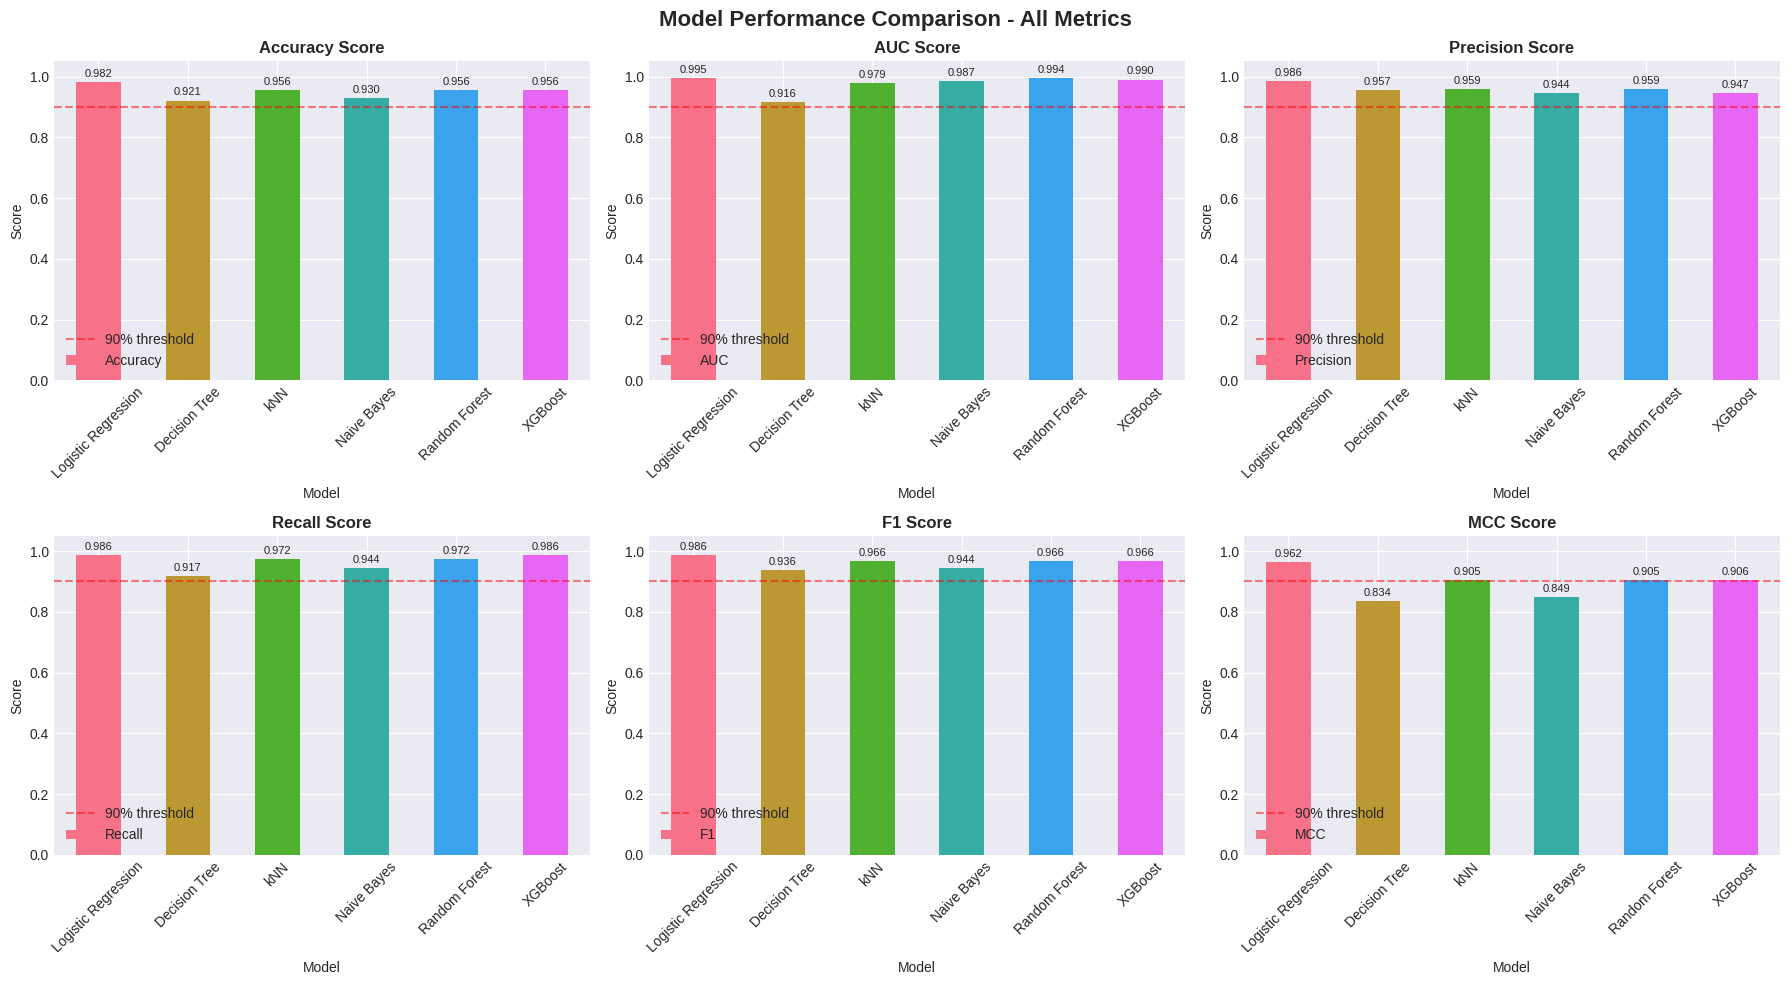


Visualization saved to 'model/model_comparison.png'


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Create figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Model Performance Comparison - All Metrics', fontsize=16, fontweight='bold')

# Plot each metric
metrics = comparison_df.columns
for idx, (ax, metric) in enumerate(zip(axes.flat, metrics)):
    comparison_df[metric].plot(kind='bar', ax=ax, color=sns.color_palette("husl", len(comparison_df)))
    ax.set_title(f'{metric} Score', fontsize=12, fontweight='bold')
    ax.set_xlabel('Model', fontsize=10)
    ax.set_ylabel('Score', fontsize=10)
    ax.set_ylim([0, 1.05])
    ax.axhline(y=0.9, color='red', linestyle='--', alpha=0.5, label='90% threshold')
    ax.legend()
    ax.tick_params(axis='x', rotation=45)

    # Add value labels on bars
    for i, v in enumerate(comparison_df[metric]):
        ax.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.savefig('model/model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nVisualization saved to 'model/model_comparison.png'")

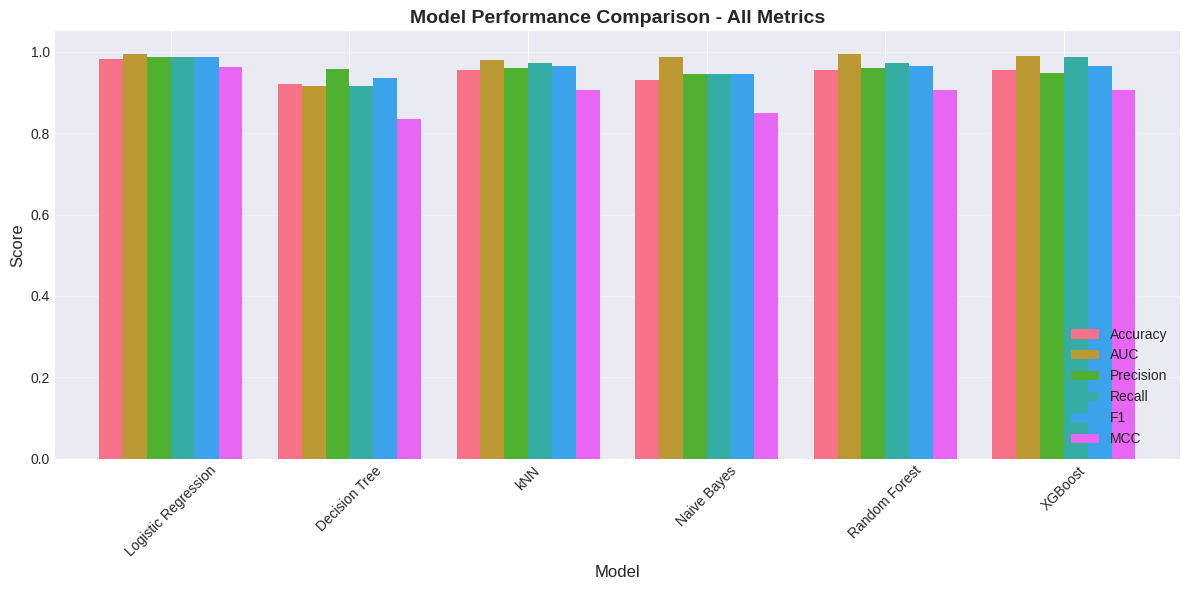

In [19]:
# Overall comparison - all metrics in one chart
fig, ax = plt.subplots(figsize=(12, 6))

comparison_df.plot(kind='bar', ax=ax, width=0.8)
ax.set_title('Model Performance Comparison - All Metrics', fontsize=14, fontweight='bold')
ax.set_xlabel('Model', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_ylim([0, 1.05])
ax.legend(loc='lower right', fontsize=10)
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 9. Save Test Data

In [20]:
# Save test data for Streamlit app
X_test.to_csv('model/test_data.csv', index=False)
y_test.to_csv('model/test_labels.csv', index=False)

print("Test data saved to 'model/test_data.csv'")
print("Test labels saved to 'model/test_labels.csv'")

Test data saved to 'model/test_data.csv'
Test labels saved to 'model/test_labels.csv'


## 10. Summary

In [21]:
print("TRAINING COMPLETE!")
print("\nDataset Information:")
print(f"   - Total samples: {len(df)}")
print(f"   - Features: {len(df.columns) - 1}")
print(f"   - Training samples: {len(X_train)}")
print(f"   - Test samples: {len(X_test)}")

print("\nModels Trained:")
for i, model_name in enumerate(results.keys(), 1):
    print(f"   {i}. {model_name}")

print("\nMetrics Evaluated:")
for i, metric in enumerate(['Accuracy', 'AUC', 'Precision', 'Recall', 'F1', 'MCC'], 1):
    print(f"   {i}. {metric}")

print("\nFiles Saved:")
print("   - 6 trained models (.pkl files)")
print("   - Scaler (scaler.pkl)")
print("   - Model comparison (model_comparison.csv)")
print("   - Test data (test_data.csv, test_labels.csv)")
print("   - Visualization (model_comparison.png)")

print("\nTop Performing Models:")
print(f"   - Best AUC: {comparison_df['AUC'].idxmax()} ({comparison_df['AUC'].max():.4f})")
print(f"   - Best Accuracy: {comparison_df['Accuracy'].idxmax()} ({comparison_df['Accuracy'].max():.4f})")
print(f"   - Best MCC: {comparison_df['MCC'].idxmax()} ({comparison_df['MCC'].max():.4f})")

print("\nAll models saved in 'model/' directory")
print("Ready for deployment!")
print("\n" + "=" * 50)

TRAINING COMPLETE!

Dataset Information:
   - Total samples: 569
   - Features: 30
   - Training samples: 455
   - Test samples: 114

Models Trained:
   1. Logistic Regression
   2. Decision Tree
   3. kNN
   4. Naive Bayes
   5. Random Forest
   6. XGBoost

Metrics Evaluated:
   1. Accuracy
   2. AUC
   3. Precision
   4. Recall
   5. F1
   6. MCC

Files Saved:
   - 6 trained models (.pkl files)
   - Scaler (scaler.pkl)
   - Model comparison (model_comparison.csv)
   - Test data (test_data.csv, test_labels.csv)
   - Visualization (model_comparison.png)

Top Performing Models:
   - Best AUC: Logistic Regression (0.9954)
   - Best Accuracy: Logistic Regression (0.9825)
   - Best MCC: Logistic Regression (0.9623)

All models saved in 'model/' directory
Ready for deployment!

